# **Introduction**

In this programming assignment, you will be practicing implementing greedy solutions. As usual, in some
problems you just need to implement an algorithm covered in the lectures, while for some others your goal
will be to first design an algorithm and then to implement it. Thus, you will be practicing designing an
algorithm, proving that it is correct, and implementing it.
Recall that starting from this programming assignment, the grader will show you only the first few tests.

## Money Change

Problem Description

**Task.** The goal in this problem is to find the minimum number of coins needed to change the input value (an integer) into coins with denominations 1, 5, and 10.

**Input Format.** The input consists of a single integer 𝑚.

**Constraints.** 1 ≤ 𝑚 ≤ $10^3$.

**Output Format.** Output the minimum number of coins with denominations 1, 5, 10 that changes 𝑚.

$\underline{Sample \hspace{0.2cm} 1.}$

Input:

`2`

Output:

`2`

$2$ = $1 + 1$.

$\hspace{0.2cm}$

$\underline{Sample \hspace{0.2cm} 2.}$

Input:

`28`

Output:

`6`

$28 = 10 + 10 + 5 + 1 + 1 + 1$.

In [ ]:
# Naive Solution

# Python 3

import sys
import time

def get_change(m):
  n = m / 10
  m %= 10
  n += m / 5
  m %= 5
  n += m
  
  return m
  
if __name__ == '__main__':
    m = int(input())
    start_time = time.time()
    print(get_change(m))
    print("--- %s seconds ---" % (time.time() - start_time))

2
2
--- 0.0008225440979003906 seconds ---


In [ ]:
# Fast Solution

# Python3

import sys
import time

n = int(input())

start_time = time.time()

count = 0
for i in [10, 5, 1]:
    if n>=i:
        q = n//i
        count += q
        n = n%i
        if n==0:
            print(count)
            quit()

print("--- %s seconds ---" % (time.time() - start_time))


1028
106
--- 0.001041412353515625 seconds ---


## Maximum Value of the Loot

Problem Description

**Task.** The goal of this code problem is to implement an algorithm for the fractional knapsack problem.

**Input Format.** The first line of the input contains the number 𝑛 of items and the capacity 𝑊 of a knapsack. The next 𝑛 lines define the values and weights of the items. The 𝑖-th line contains integers 𝑣𝑖 and 𝑤𝑖—the
value and the weight of 𝑖-th item, respectively.

**Constraints.** 1 ≤ 𝑛 ≤ $10^3$, 0 ≤ 𝑊 ≤ 2 · $10^6$; 0 ≤ 𝑣𝑖 ≤ 2 · $10^6$, 0 < 𝑤𝑖 ≤ 2 · $10^6$ for all 1 ≤ 𝑖 ≤ 𝑛. All the numbers are integers.

**Output Format.** Output the maximal value of fractions of items that fit into the knapsack. The absolute value of the difference between the answer of your program and the optimal value should be at most $10^{-3}$. To ensure this,output your answer with at least four digits after the decimal point (otherwise your answer, while being computed correctly, can turn out to be wrong because of rounding issues).

$\underline{Sample \hspace{0.2cm} 1.}$

Input:

`3 50`

`60 20`

`100 50`

`120 30`

Output:

`180.0000`

To achieve the value 180, we take the first item and the third item into the bag.

$\hspace{0.2cm}$

$\underline{Sample \hspace{0.2cm} 2.}$

Input:

`1 10`

`500 30`

Output:

`166.6667`

To achieve the value 180, we take the first item and the third item into the bag.

In [ ]:
# Direct Solution (no more naive BS)

# Python3

import sys
import time

n, W = [int(i) for i in input().split()]
lst = []



if W == 0:
    print(0)
    quit()

for _ in range(n):
    v, w = [int(i) for i in input().split()]
    if v == 0:
        continue
    lst.append((v, w))

lst.sort(key = lambda x: x[0]/x[1], reverse = True)

total_value = 0

start_time = time.time()

for v,w in lst:
    if W==0:
        print(total_value)
        quit()
    amt = min(w, W)
    total_value += amt*v/w
    W -= amt

print(total_value)
print("--- %s seconds ---" % (time.time() - start_time))

1 10
500 30
166.66666666666666
--- 0.0002703666687011719 seconds ---


## Car Fueling

Problem Description

You are going to travel to another city that is located 𝑑 miles away from your home city. Your car can travel at most 𝑚 miles on a full tank and you start with a full tank. Along your way, there are gas stations at distances stop1, stop2, . . . , stop𝑛 from your home city. What is the minimum number of refills needed?

**Input Format.** The first line contains an integer 𝑑. The second line contains an integer 𝑚. The third line specifies an integer 𝑛. Finally, the last line contains integers stop1, stop2, . . . , stop𝑛.

**Constraints.** 1 ≤ 𝑑 ≤ $10^5$. 1 ≤ 𝑚 ≤ 400. 1 ≤ 𝑛 ≤ 300. 0 < stop1 < stop2 < · · · < stop𝑛 < 𝑑.

**Output Format.** Assuming that the distance between the cities is 𝑑 miles, a car can travel at most 𝑚 miles on a full tank, and there are gas stations at distances stop1, stop2, . . . , stop𝑛 along the way, output the minimum number of refills needed. Assume that the car starts with a full tank. If it is not possible to reach the destination, output −1.

$\underline{Sample \hspace{0.2cm} 1.}$

Input:

`950`

`400`

`4`

`200 375 550 750`

Output:

`2`

The distance between the cities is 950, the car can travel at most 400 miles on a full tank. It suffices to make two refills: at points 375 and 750. This is the minimum number of refills as with a single refill one would only be able to travel at most 800 miles.

In [ ]:
# Direct Solution (no more naive BS)

# Python3

import sys
import time

def compute_min_refills(distance, tank, stops):
    stops.append(distance)
    no_stops = 0
    left_dist = distance
    covered_dist = 0
    for i in range(len(stops) - 1):
        if (left_dist == 0):
            break
        elif ((stops[i + 1] - stops[i]) > tank):
            no_stops = -1
            break
        elif ((covered_dist + tank) >= stops[i] and (covered_dist + tank) < stops[i + 1]):
            covered_dist = stops[i]
            left_dist = distance - stops[i]
            no_stops +=  1
    return no_stops


if __name__ == '__main__':
    d, m, _, *stops = map(int, input().split())
    start_time = time.time()
    print(compute_min_refills(d, m, stops))
    print("--- %s seconds ---" % (time.time() - start_time))


950 400 4 200 375 550 750
2
--- 0.00014495849609375 seconds ---


## Maximum Advertisement Revenue

Problem Description

**Task.** Given two sequences 𝑎1, 𝑎2, . . . , 𝑎𝑛 (𝑎𝑖 is the profit per click of the 𝑖-th ad) and 𝑏1, 𝑏2, . . . , 𝑏𝑛 (𝑏𝑖 is the average number of clicks per day of the 𝑖-th slot), we need to partition them into 𝑛 pairs  𝑎𝑖, 𝑏𝑗) such that the sum of their products is maximized.

**Input Format.** The first line contains an integer 𝑛, the second one contains a sequence of integers 𝑎1, 𝑎2, . . . , 𝑎𝑛, the third one contains a sequence of integers 𝑏1, 𝑏2, . . . , 𝑏𝑛.

**Constraints.** 1 ≤ 𝑛 ≤ $10^3$; −$10^5$ ≤ 𝑎𝑖, 𝑏𝑖 ≤ $10^5$ for all 1 ≤ 𝑖 ≤ 𝑛.

**Output Format.** Output the maximum value of $\sum^n_{i=1}$ 𝑎𝑖 𝑐𝑖, where 𝑐1, 𝑐2, . . . , 𝑐𝑛 is a permutation of 𝑏1, 𝑏2, . . . , 𝑏𝑛.

$\underline{Sample \hspace{0.2cm} 1.}$

Input:

`1`

`23`

`39`

Output:

`897`

$897 = 23 · 39.$



In [ ]:
# Direct Solution (no more naive BS)

# Python3

import sys
import time

n = int(input())
a = [int(i) for i in input().split()]
b = [int(i) for i in input().split()]
start_time = time.time()
a.sort()
b.sort()
ans = sum([a[i]*b[i] for i in range(n)])
print(ans)
print("--- %s seconds ---" % (time.time() - start_time))

1
23
39
897
--- 0.0003726482391357422 seconds ---


## Collecting Signatures

Problem Description

**Task.** Given a set of 𝑛 segments {[𝑎0, 𝑏0], [𝑎1, 𝑏1], . . . , [𝑎𝑛−1, 𝑏𝑛−1]} with integer coordinates on a line, find the minimum number 𝑚 of points such that each segment contains at least one point. That is, find a
set of integers 𝑋 of the minimum size such that for any segment [𝑎𝑖, 𝑏𝑖] there is a point 𝑥 ∈ 𝑋 such that 𝑎𝑖 ≤ 𝑥 ≤ 𝑏𝑖.

**Input Format.** The first line of the input contains the number 𝑛 of segments. Each of the following 𝑛 lines contains two integers 𝑎𝑖 and 𝑏𝑖 (separated by a space) defining the coordinates of endpoints of the 𝑖-th
segment.

**Constraints.** 1 ≤ 𝑛 ≤ 100; 0 ≤ 𝑎𝑖 ≤ 𝑏𝑖 ≤ $10^9$ for all 0 ≤ 𝑖 < 𝑛.

**Output Format.** Output the minimum number 𝑚 of points on the first line and the integer coordinates of 𝑚 points (separated by spaces) on the second line. You can output the points in any order. If there are many such sets of points, you can output any set. (It is not difficult to see that there always exist a set of points of the minimum size such that all the coordinates of the points are integers.)

$\underline{Sample \hspace{0.2cm} 1.}$

Input:

`3`

`1 3`

`2 5`

`3 6`

Output:

`1`

`3`

In this sample, we have three segments: [1, 3], [2, 5], [3, 6] (of length 2, 3, 3 respectively). All of them contain the point with coordinate 3: 1 ≤ 3 ≤ 3, 2 ≤ 3 ≤ 5, 3 ≤ 3 ≤ 6.


In [ ]:
# Direct Solution (no more naive BS)

# Python3

import sys
import time

n = int(input())
lst = []

for _ in range(n):
    a, b = [int(i) for i in input().split()]
    lst.append((a,b))

start_time = time.time()

lst.sort(key = lambda x: x[1])

index = 0
coordinates = []

while index < n:
    curr = lst[index]
    while index < n-1 and curr[1]>=lst[index+1][0]:
        index += 1
    coordinates.append(curr[1])
    index += 1
print(len(coordinates))
print(' '.join([str(i) for i in coordinates]))
print("--- %s seconds ---" % (time.time() - start_time))

3
1 3
2 5
3 6
1
3
--- 0.0004851818084716797 seconds ---


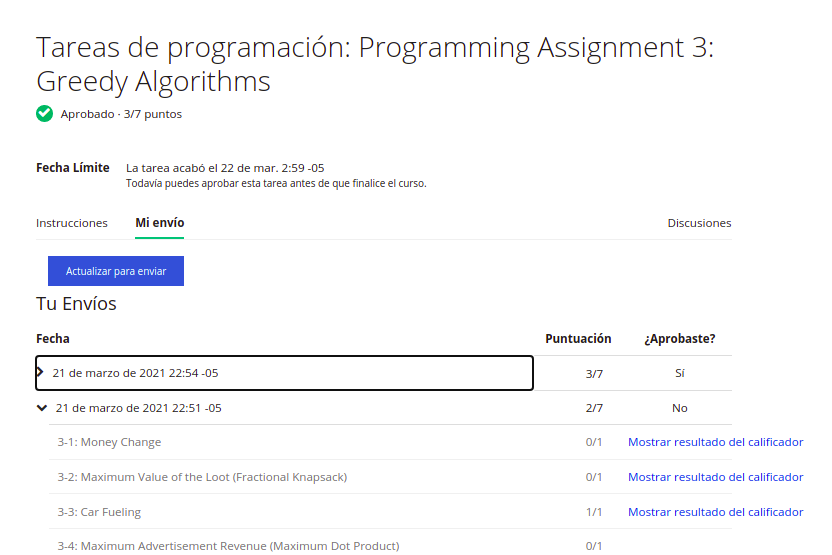